## <span style="font-size: 35px;">**Table of Contents**

1. [Library Imports and QoL Settings](#Library)
2. [Data Loading and Preprocessing](#DataLoad)
3. [Data Visualization](#DataVis)
4. [Time Series Decomposition](#TSDecomp)
5. [Train Test Split](#TrainTest)
6. [Test for Stationarity](#station)
7. [Building a SARIMA Model](#SARIMA)
8. [Conclusions](#Conclusions)


## <span style="font-size: 35px;">**Library Imports and QoL Settings**<a id='Library'></a>

In [6]:
## Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from warnings import filterwarnings
from datetime import datetime
filterwarnings("ignore")

#Visualization
from statsmodels.graphics.tsaplots import month_plot

#Dates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#TS Plots
from statsmodels.graphics.tsaplots import month_plot

#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#Evaluation Smoothing and prediction
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Performance Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

#Statistics
from statsmodels.distributions.empirical_distribution import ECDF

#Dickey fuller Test
from statsmodels.tsa.stattools import adfuller

#Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Iteration
import itertools

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima.arima import auto_arima

#Mean Squared Error
from sklearn.metrics import  mean_squared_error

#Linear Regression
from sklearn.linear_model import LinearRegression

#Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#SARIMA
import statsmodels.api as sm

## <span style="font-size: 35px;">**Data Loading and Preprocessing**
<a id='DataLoad'></a>

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

<span style="font-size: 27px;">**Data Description:** <br><br>

Data Derived from: [Global Temp](https://datahub.io/core/global-temp)

In [8]:
ts_df = pd.read_csv("D:\Datasets\monthly_csv.csv")
ts_df.sample(5)

,Source,Date,Mean
1664,GCAG,1947-08-06,-0.0623
827,GISTEMP,1982-07-06,0.1300
2920,GCAG,1895-04-06,-0.1868
2714,GCAG,1903-11-06,-0.3950
2609,GISTEMP,1908-04-06,-0.4600


In [9]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Date    3288 non-null   object 
 2   Mean    3288 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


In [10]:
ts_df['Date'] = pd.to_datetime(ts_df['Date'])

In [11]:
ts_df['Source'].value_counts()

GCAG       1644
GISTEMP    1644
Name: Source, dtype: int64

In [12]:
ts_df.isnull().sum()

Source    0
Date      0
Mean      0
dtype: int64

In [13]:
date_temp_index = pd.date_range(start='1/6/1880', end='1/6/2017', freq='M')     # month/day/year
date_temp_index

DatetimeIndex(['1880-01-31', '1880-02-29', '1880-03-31', '1880-04-30',
               '1880-05-31', '1880-06-30', '1880-07-31', '1880-08-31',
               '1880-09-30', '1880-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', length=1644, freq='M')

In [14]:
temp_index_df = ts_df[ts_df['Source']=='GISTEMP']
temp_index_df.head()

,Source,Date,Mean
1,GISTEMP,2016-12-06,0.81
3,GISTEMP,2016-11-06,0.93
5,GISTEMP,2016-10-06,0.89
7,GISTEMP,2016-09-06,0.87
9,GISTEMP,2016-08-06,0.98


In [15]:
temp_index_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,1644.0,0.02438,0.343709,-0.78,-0.23,-0.05,0.23,1.35


In [16]:
temp_index_df.duplicated().sum()

0

In [17]:
# Setting the Date as index
temp_index_df = temp_index_df.set_index(date_temp_index[::-1])
temp_index_df['Mean']

2016-12-31    0.81
2016-11-30    0.93
2016-10-31    0.89
2016-09-30    0.87
2016-08-31    0.98
              ... 
1880-05-31   -0.14
1880-04-30   -0.27
1880-03-31   -0.18
1880-02-29   -0.21
1880-01-31   -0.30
Freq: -1M, Name: Mean, Length: 1644, dtype: float64

## <span style="font-size: 35px;">**Data Visualization**
<a id='DataVis'></a>

<span style="font-size: 25px;">**Time Series Plot**

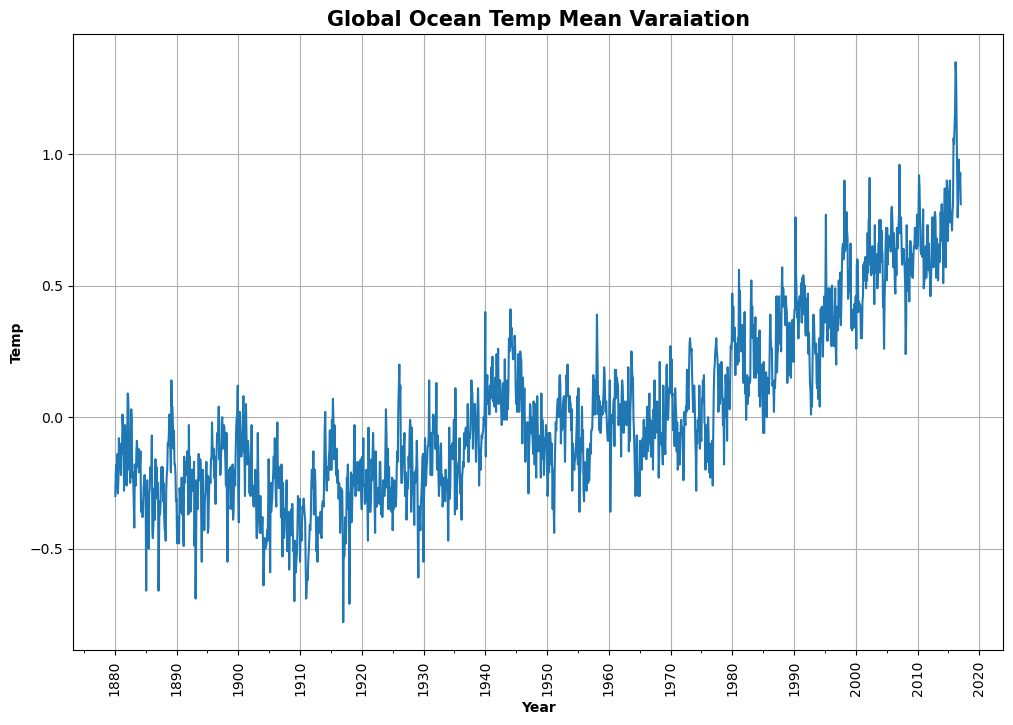

In [18]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(temp_index_df.index,temp_index_df['Mean'])

# Set title and labels for axes
plt.title("Global Ocean Temp Mean Varaiation",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(5))
plt.xticks(rotation = 90);

plt.show()

<span style="font-size: 25px;">**Yearly perspective Plot**

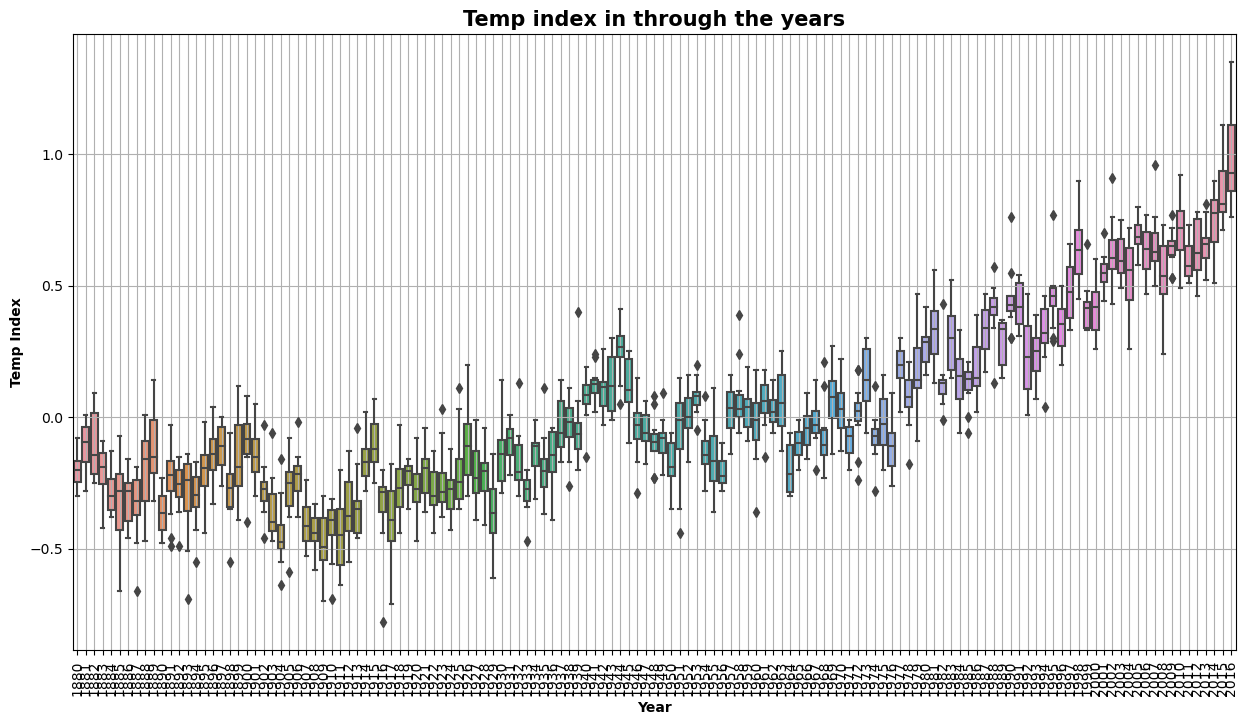

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x=temp_index_df.index.year,y=temp_index_df['Mean'])
plt.title("Temp index in through the years",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp Index",fontsize=10,weight="bold")
plt.grid()
# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(5))
plt.xticks(rotation = 90);

plt.show()


## <span style="font-size: 35px;">**Time Series Decomposition**
<a id='TSDecomp'></a>

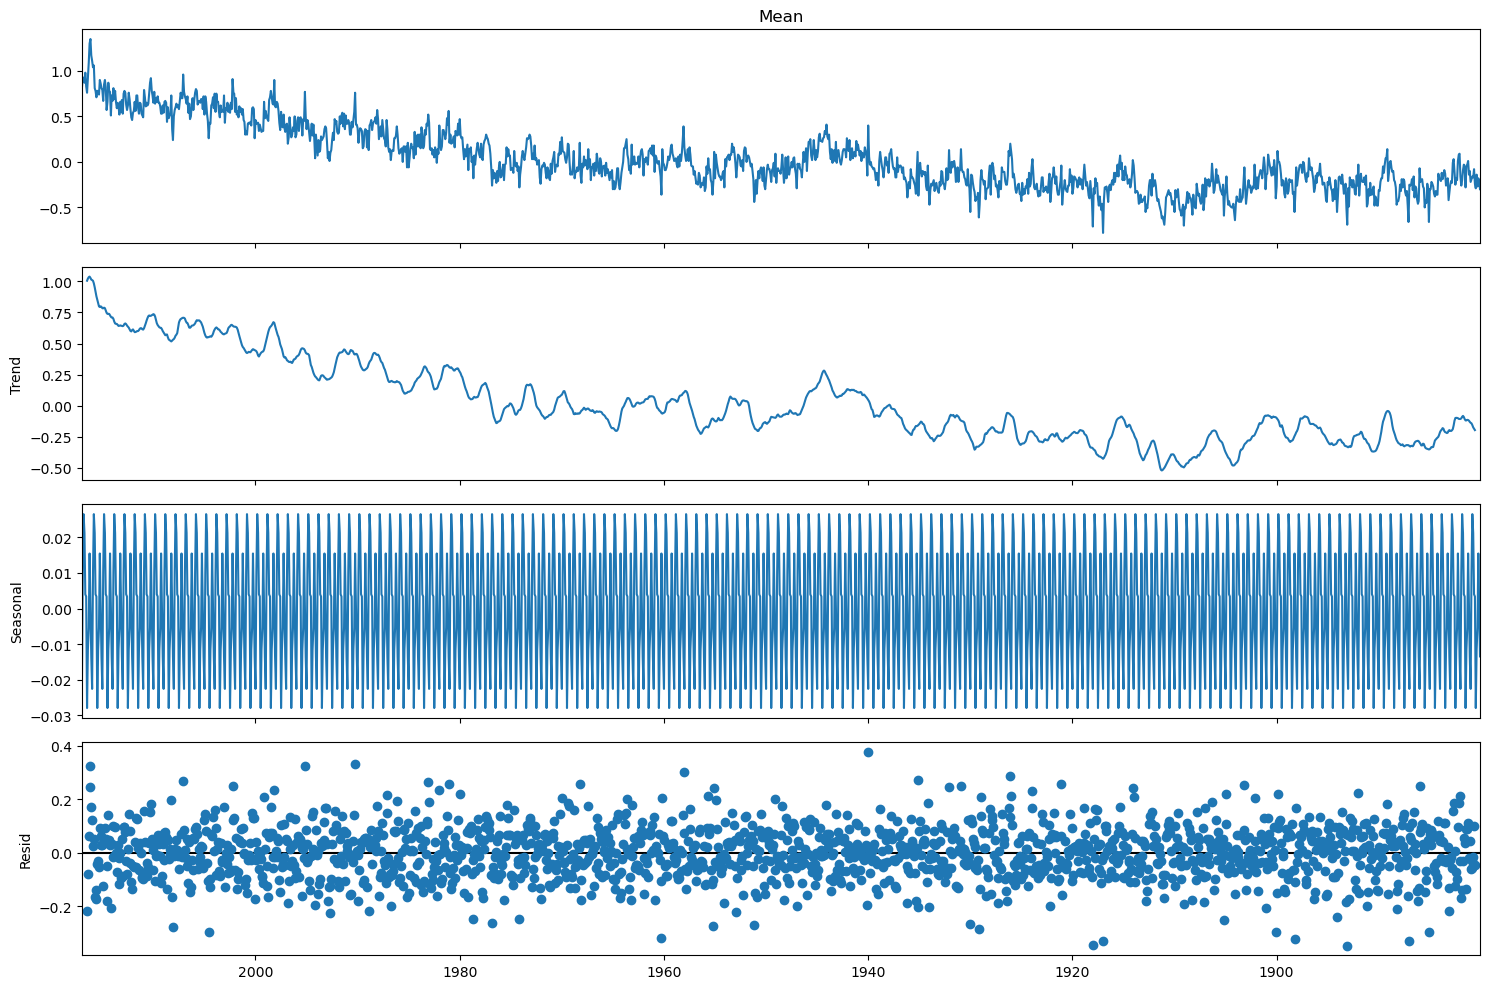

In [20]:
rcParams['figure.figsize'] = 15,10
decomposition_add = seasonal_decompose(temp_index_df['Mean'],model='additive', period = 12)
decomposition_add.plot();

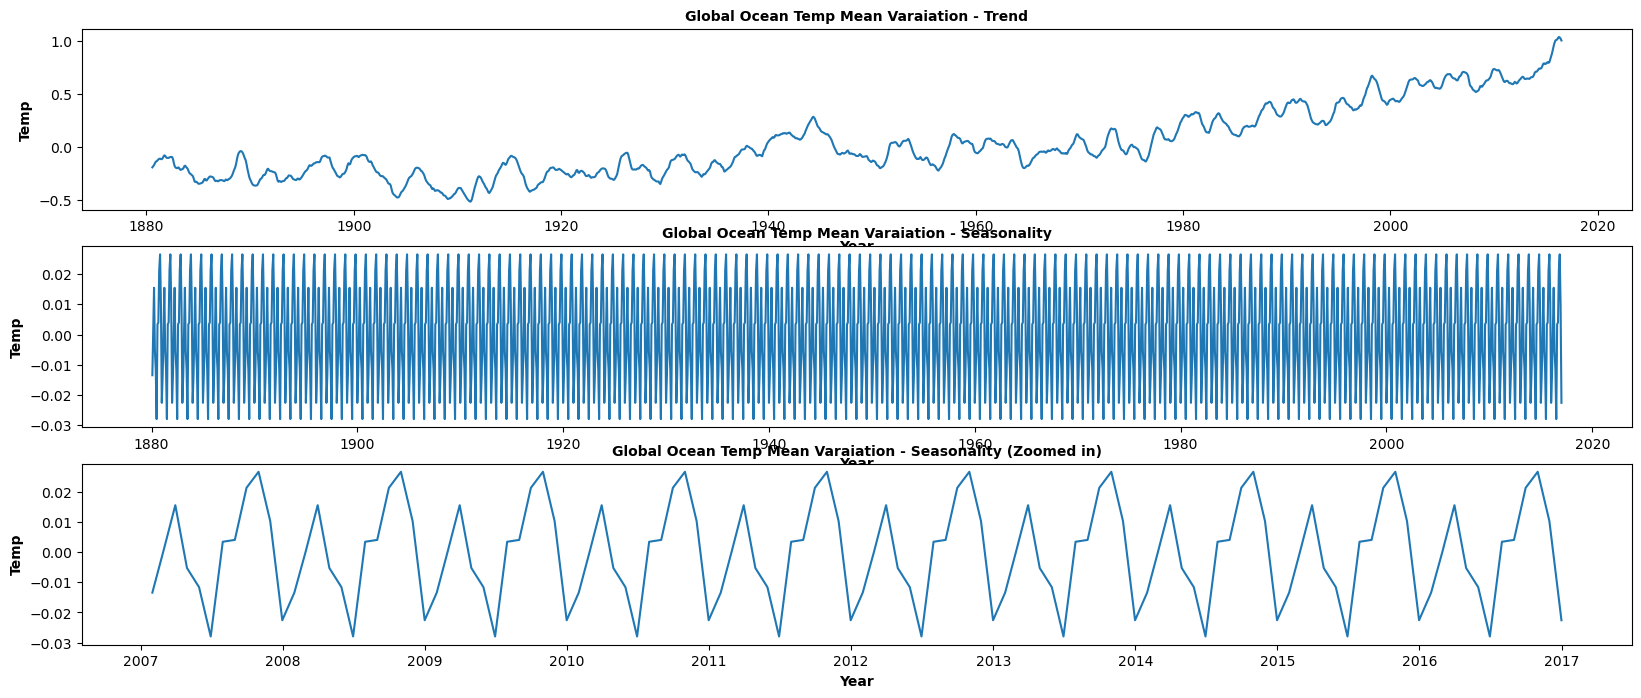

In [21]:
# Create figure and plot space
plt.figure(figsize=(20,8))

plt.subplot(3,1,1)
plt.plot(temp_index_df.index,decomposition_add.trend)
# Set title and labels for axes
plt.title("Global Ocean Temp Mean Varaiation - Trend",fontsize=10, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp",fontsize=10,weight="bold")

plt.subplot(3,1,2)
plt.plot(temp_index_df.index,decomposition_add.seasonal)

# Set title and labels for axes
plt.title("Global Ocean Temp Mean Varaiation - Seasonality",fontsize=10, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp",fontsize=10,weight="bold")

plt.subplot(3,1,3)
plt.plot(temp_index_df.index[0:120],decomposition_add.seasonal[0:120])

# Set title and labels for axes
plt.title("Global Ocean Temp Mean Varaiation - Seasonality (Zoomed in)",fontsize=10, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp",fontsize=10,weight="bold");

## <span style="font-size: 35px;">**Train Test Split**
<a id='TrainTest'></a>

In [22]:
temp_index_train = temp_index_df[(temp_index_df.index.year < 2014)]
temp_index_test = temp_index_df[temp_index_df.index.year >= 2014]

In [23]:
temp_index_latest_train = temp_index_df[(temp_index_df.index.year < 2014) & (temp_index_df.index.year > 2005)]
temp_index_latest_test = temp_index_df[temp_index_df.index.year >= 2014]

## <span style="font-size: 35px;">**For All TS data**
<a id='TrainTest'></a>

### <span style="font-size: 35px;">**Test for Stationarity**
<a id='station'></a>

Before we proceed to build ARIMA/SARIMA models for the given data set we must first check for stationarity in the time series using Dickey Fuller Test.

Note: <br>
In a Dickey Fuller Test:

Null Hypothesis: **H0** - Series is not Stationary *i.e. p > 0.05* <br>
Alternative Hypothesis: **H1** - Series is Stationary *i.e. p <= 0.05*  <br>

Function **adfuller()** provides the following information.



*   p-value
*   Value of the test statistic
*   Number of lags for testing consideration
*   The critical values

In [24]:
## Test for stationarity of the series - Dicky Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.grid()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always

    #Perform Dickey-Fuller test:
    print ('\n Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print('\t%s: %.3f' % (key, value))
    print('\n')
    print (dfoutput,'\n')
    if dftest[0] < dftest[4]["5%"]:
      print("Reject Ho - Time Series is Stationary")
    else:
      print ("Failed to Reject Ho - Time Series is Non-Stationary")

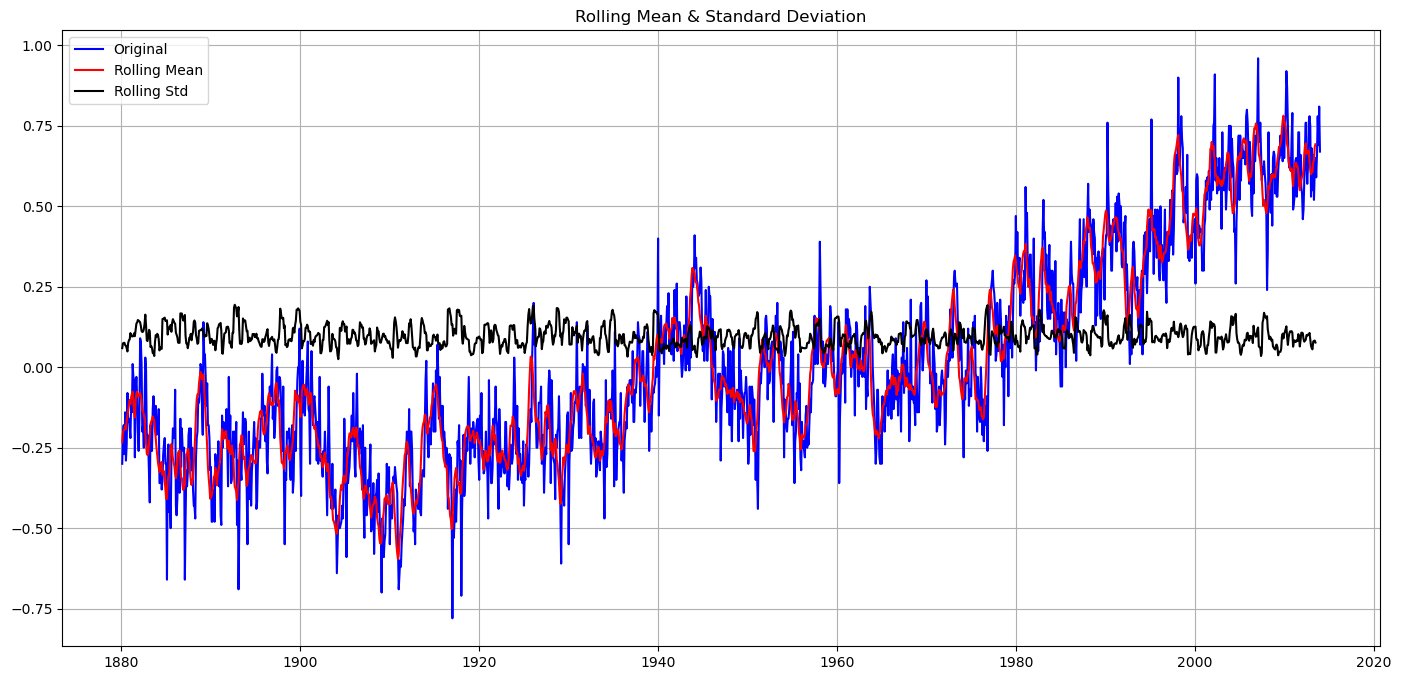


 Results of Dickey-Fuller Test:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Test Statistic                   -2.172359
p-value                           0.216430
#Lags Used                       24.000000
Number of Observations Used    1583.000000
Critical Value (1%)              -3.434488
Critical Value (5%)              -2.863368
Critical Value (10%)             -2.567743
dtype: float64 

Failed to Reject Ho - Time Series is Non-Stationary


In [25]:
rcParams['figure.figsize'] = 17,8
test_stationarity(temp_index_train['Mean'])

p > 0.05 Hence Series is not stationary, applying a Lag of 1 and testing for stationarity again.

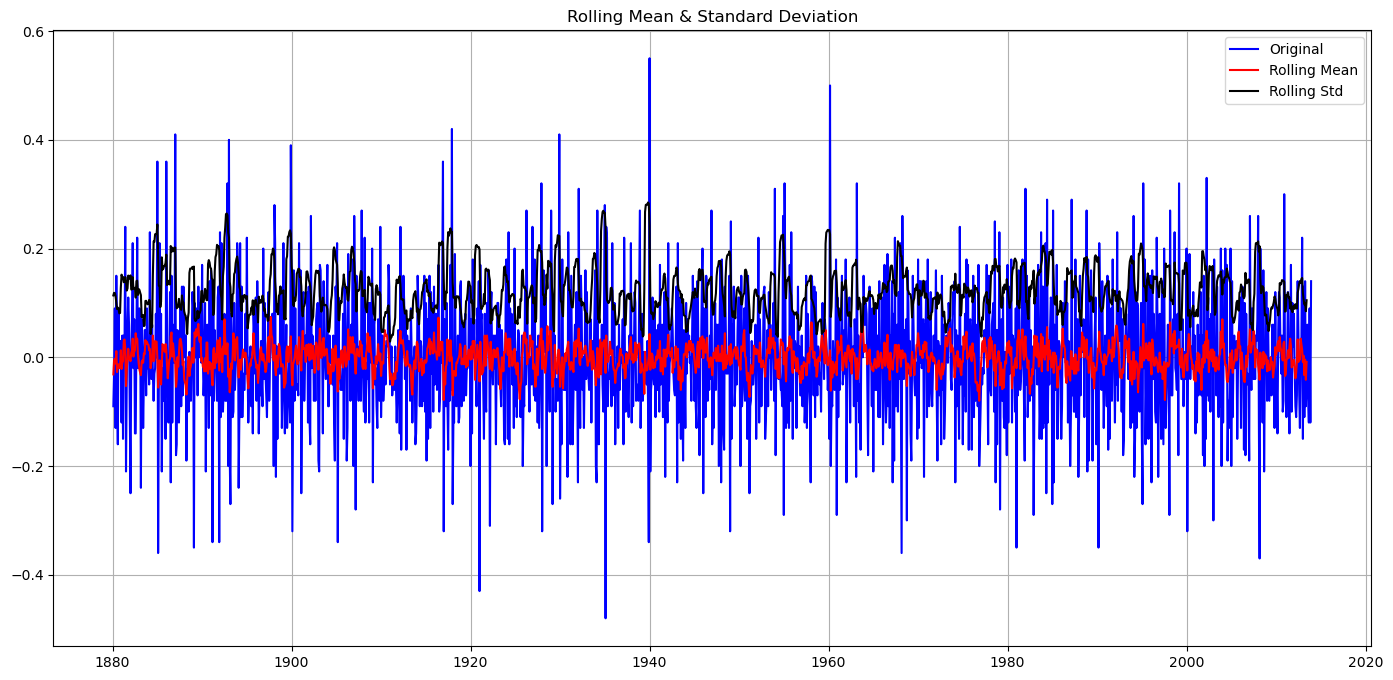


 Results of Dickey-Fuller Test:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Test Statistic                -1.220685e+01
p-value                        1.188197e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.583000e+03
Critical Value (1%)           -3.434488e+00
Critical Value (5%)           -2.863368e+00
Critical Value (10%)          -2.567743e+00
dtype: float64 

Reject Ho - Time Series is Stationary


In [26]:
test_stationarity(temp_index_train['Mean'].diff().dropna())

p for a lag of 1 is < 0.05 hence making the series with a lag of 1 a stationary series i.e **d = 1**

Checking the same Given a seasonality of 12

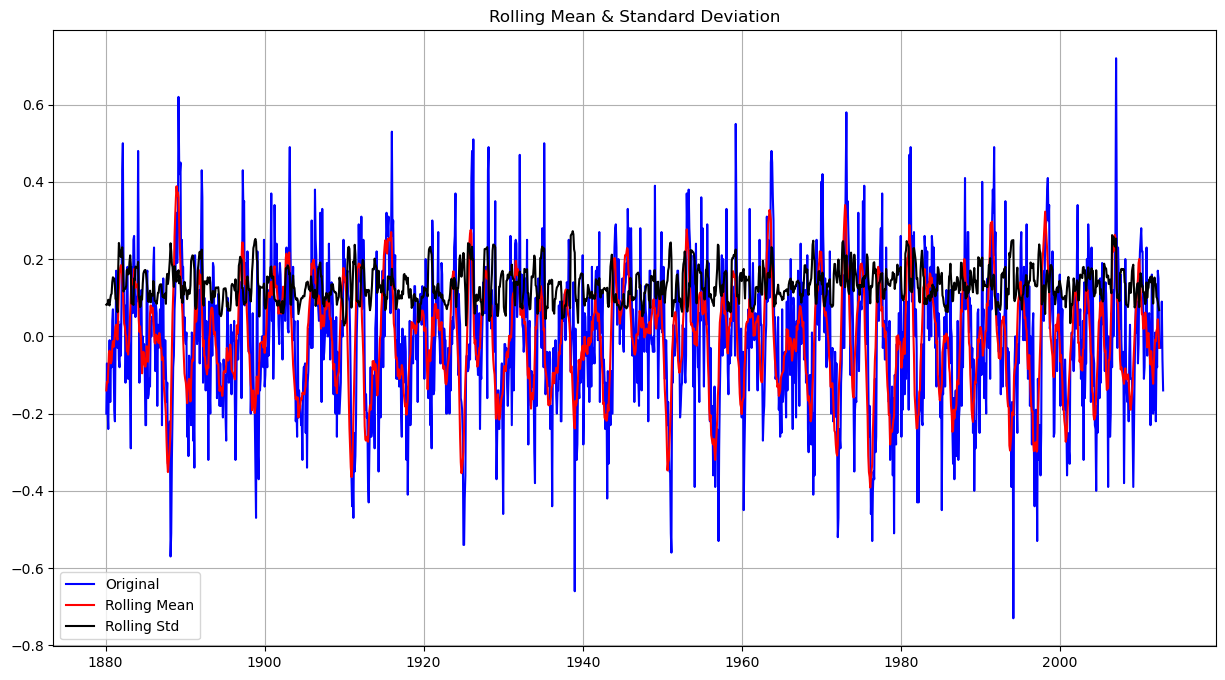


 Results of Dickey-Fuller Test:
	1%: -3.435
	5%: -2.863
	10%: -2.568


Test Statistic                -1.106178e+01
p-value                        4.789434e-20
#Lags Used                     2.400000e+01
Number of Observations Used    1.571000e+03
Critical Value (1%)           -3.434519e+00
Critical Value (5%)           -2.863382e+00
Critical Value (10%)          -2.567750e+00
dtype: float64 

Reject Ho - Time Series is Stationary


In [27]:
rcParams['figure.figsize'] = 15,8
test_stationarity(temp_index_train['Mean'].diff(12).dropna())

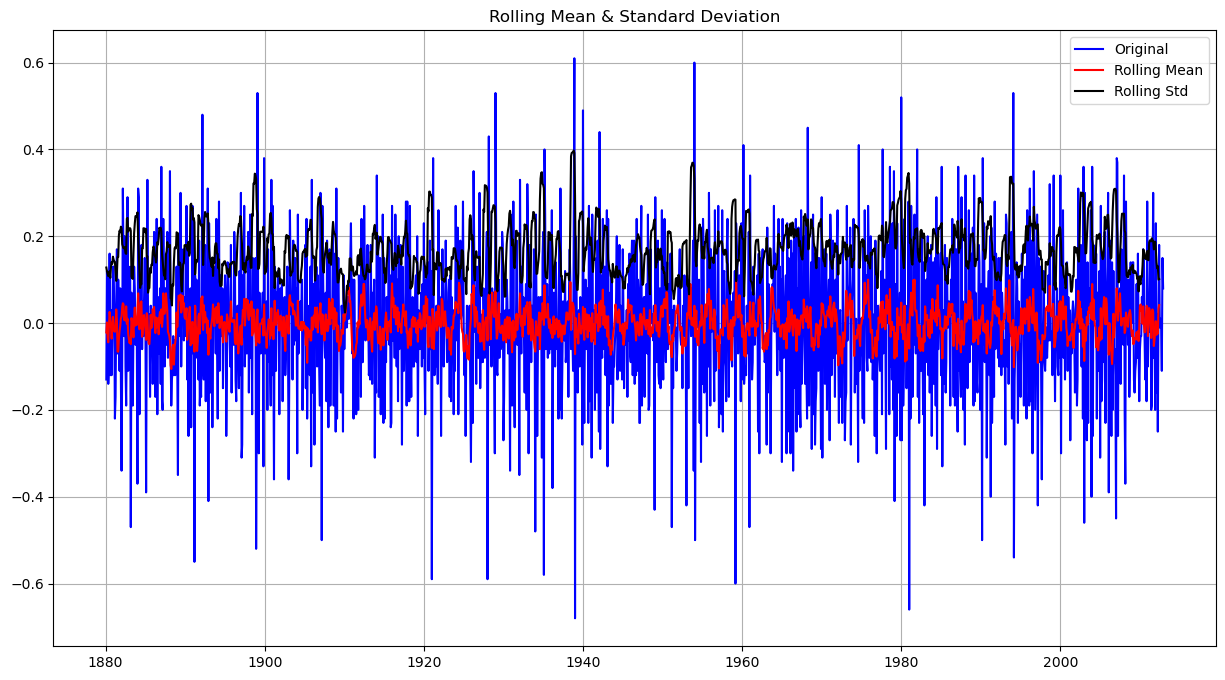


 Results of Dickey-Fuller Test:
	1%: -3.435
	5%: -2.863
	10%: -2.568


Test Statistic                -1.273479e+01
p-value                        9.210567e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.570000e+03
Critical Value (1%)           -3.434522e+00
Critical Value (5%)           -2.863383e+00
Critical Value (10%)          -2.567751e+00
dtype: float64 

Reject Ho - Time Series is Stationary


In [28]:
rcParams['figure.figsize'] = 15,8
test_stationarity(temp_index_train['Mean'].diff(12).diff().dropna())

**D = 1**

### <span style="font-size: 35px;">**Building a SARIMA Model - Full Data**
<a id='SARIMA'></a>

In order to build the SARIMA model we first need to determine the most optimal value of the following parameters: <br>



*   **p**: Trend autoregression order.
*   **d**: Trend difference order.
*   **q**: Trend moving average order.
*   **P**: Seasonal autoregression order.
*   **D**: Seasonal Difference Order.
*   **Q**: Seasonal Moving average order.
*   **m** : The number of time steps for a single seasonal period.<br><br>


Some of the few ways to determine the optimal value are:<br>


*   Determining through Auto Correletion and Partial Autocorrelation Plots
*   AIC Score




Let us first try to determine with Autocorrelation and partial autocorrelation plots:

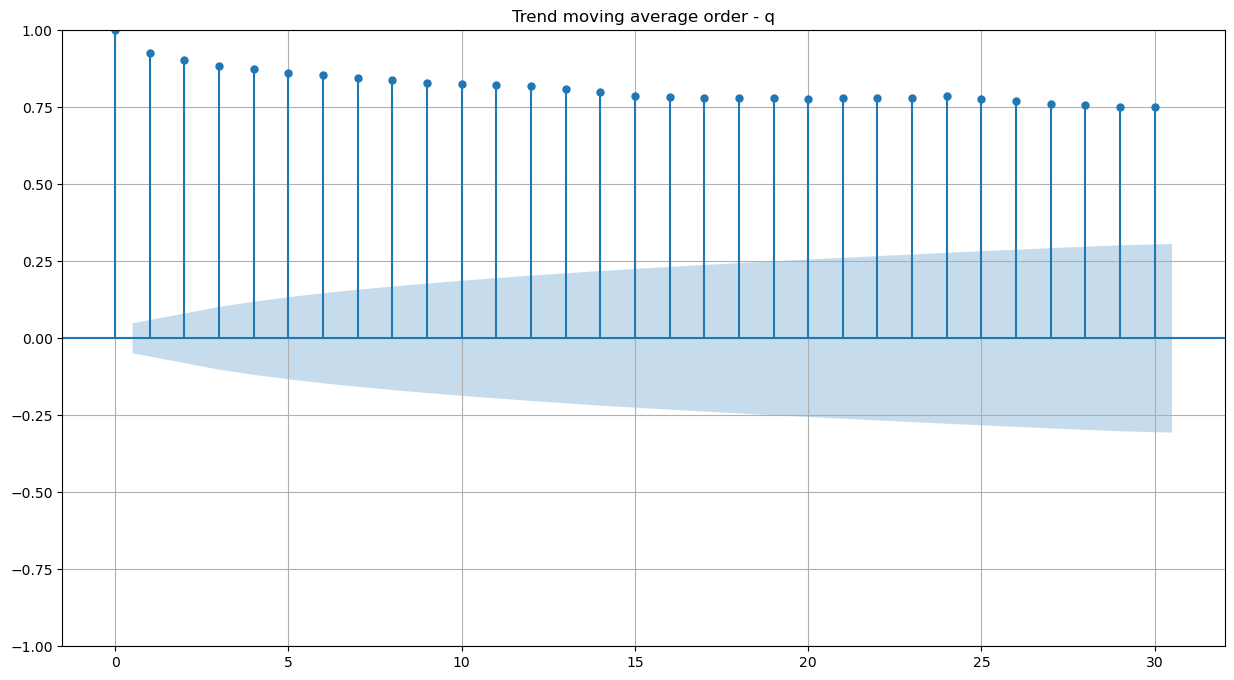

In [29]:
#To determine 'q'
plot_acf(temp_index_train['Mean'],lags=30,title='Trend moving average order - q');
plt.grid()
plt.show();

q = 2

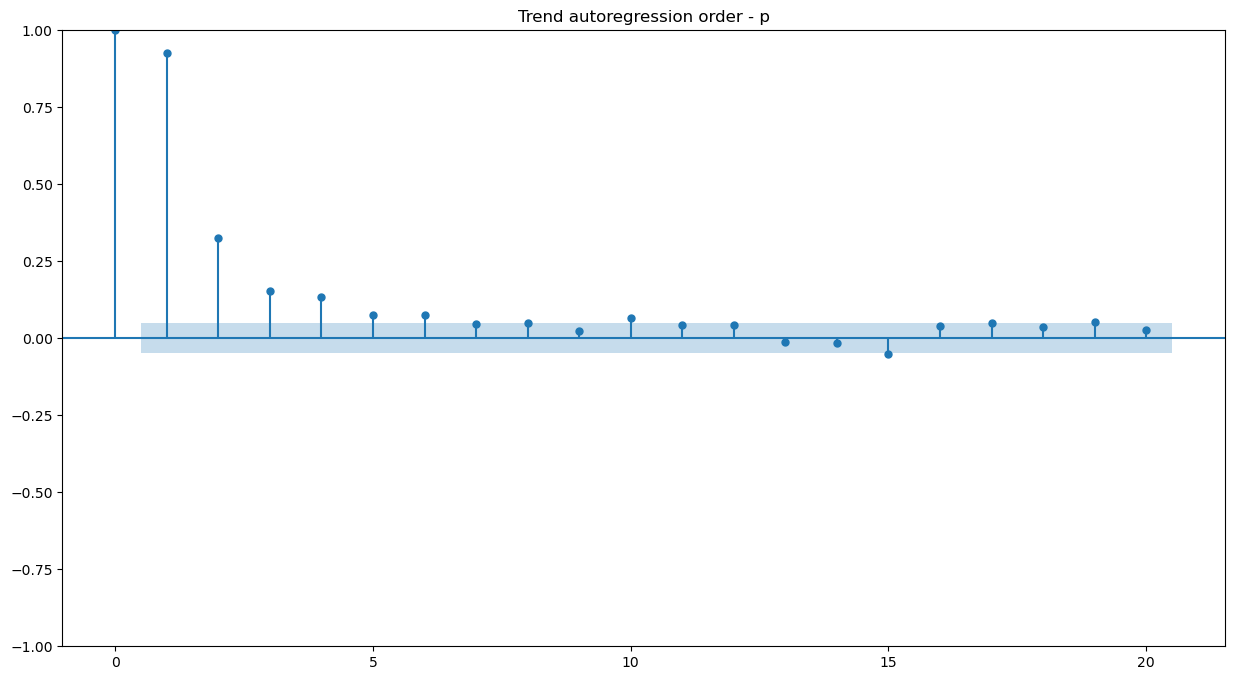

In [30]:
#To determine 'p'
plot_pacf(temp_index_train['Mean'],lags=20, title='Trend autoregression order - p');
plt.show();

p = 1

Looking at the seasonal plot we can see that there is a distinct seasonality for the year i.e. m = 12, the corresponding Autocorrelation and Partial Auto Correlation Plot is given as:

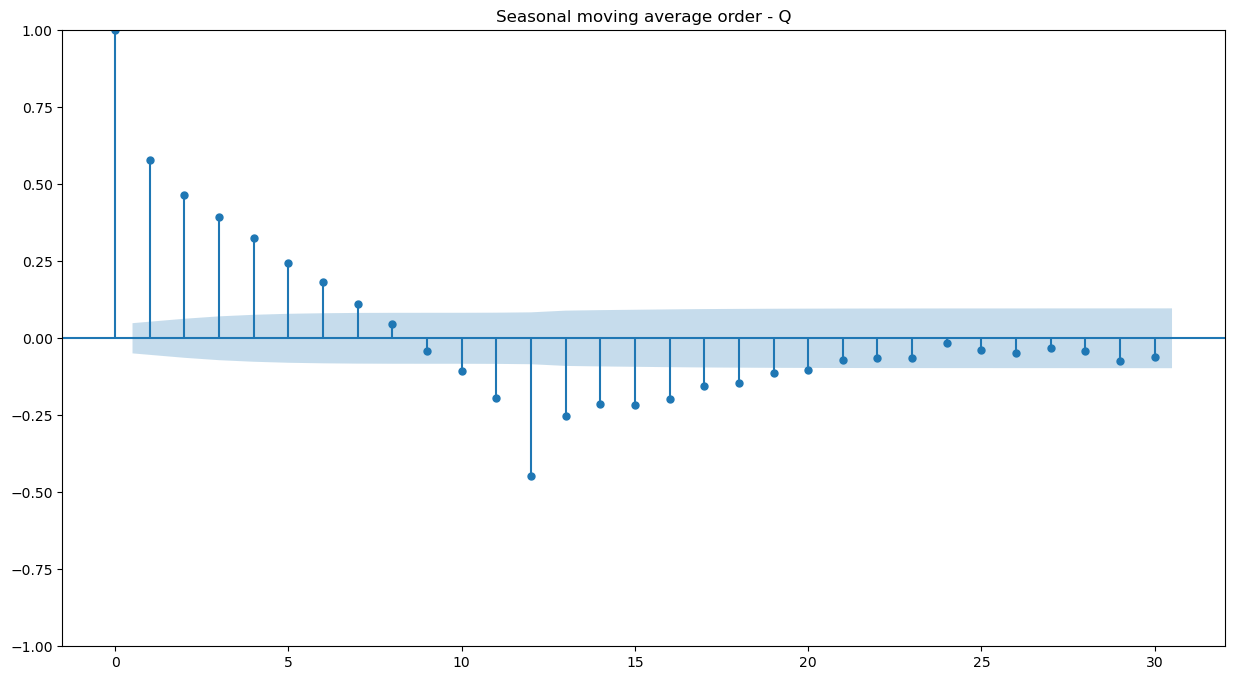

In [31]:
#To determine 'Q'
plot_acf(temp_index_train['Mean'].diff(12).dropna(),lags=30,title='Seasonal moving average order - Q')
plt.show()

Q = 0

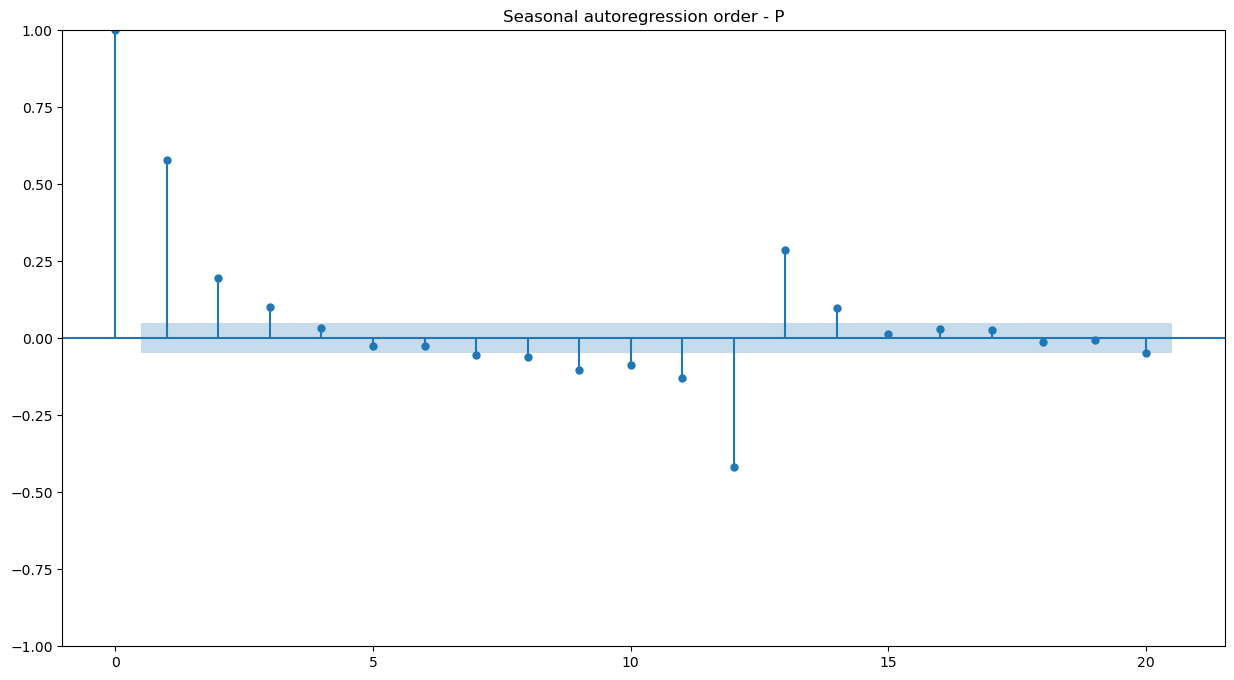

In [32]:
#To determine 'P'
plot_pacf(temp_index_train['Mean'].diff(12).dropna(),lags=20,title='Seasonal autoregression order - P')
plt.show()

P = 0

Given the Optimal Values Determined the AIC value is given as:

In [33]:
# temp_index_SARIMA_model = sm.tsa.statespace.SARIMAX(temp_index_train['Mean'].values,
#                                             order=(5,1,1),
#                                             seasonal_order=(3,0,7,12),
#                                             enforce_stationarity=False,  ## by force you can make it TS stationary
#                                             enforce_invertibility=False) ## Alpha and Beta should be unique

# temp_index_results_SARIMA = temp_index_SARIMA_model.fit(maxiter = 1000)
# print(f'SARIMA(6,1,110)x(3,0,7,12) - AIC:{temp_index_results_SARIMA.aic}')

In [34]:
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1

In [35]:
model = auto_arima(temp_index_train['Mean'], start_p=0, start_q=0,
                      test='adf',
                      max_p=p+1, max_q=q+1,
                      m=12,
                      d=d,
                      seasonal=True,
                      start_P=0,max_P=P+1,
                      start_Q = 0, max_Q =Q+1,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1127.603, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1890.507, Time=0.89 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1353.410, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-2027.535, Time=2.73 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.29 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-1788.224, Time=3.06 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-2095.046, Time=4.81 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-1954.765, Time=1.67 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.27 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.71 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-2159.585, Time=6.16 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-2010.910, Time=4.55 sec
 ARIMA(2,1,1)(2,1,1)[12]          

In [36]:
temp_index_SARIMA = sm.tsa.statespace.SARIMAX(temp_index_train['Mean'].values,
                                              trend=[1,1,0,0],
                                              order=(6, 1, 1),
                                              seasonal_order=(1, 1, 1, 12),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)

temp_index_results_SARIMA = temp_index_SARIMA.fit(maxiter = 2000);
print(temp_index_results_SARIMA.summary());

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1608
Model:             SARIMAX(6, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1037.668
Date:                            Wed, 30 Aug 2023   AIC                          -2051.336
Time:                                    13:13:13   BIC                          -1986.977
Sample:                                         0   HQIC                         -2027.420
                                           - 1608                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.004      0.133      0.894      -0.007       0.008
drift       -8.76e-07   4.19e-06   

In [37]:
temp_index_predicted_forecast = temp_index_results_SARIMA.get_forecast(steps=len(temp_index_test))
temp_index_predicted_forecast_date = temp_index_predicted_forecast.summary_frame(alpha=0.05).set_index(temp_index_test.index)
temp_index_predicted_forecast.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,-0.327502,0.152980,-0.627338,-0.027667
1,-0.345272,0.172397,-0.683164,-0.007380
2,-0.304215,0.185467,-0.667723,0.059293
3,-0.228388,0.196909,-0.614322,0.157546
4,-0.178520,0.206609,-0.583466,0.226425


In [38]:
temp_index_SARIMA_rmse = mean_squared_error(temp_index_test['Mean'],temp_index_predicted_forecast.predicted_mean,squared=False)
temp_index_SARIMA_resultsDf2 = pd.DataFrame({'RMSE': [temp_index_SARIMA_rmse]},index=['temp_index - SARIMA(1,1,1)(2,0,1,12)'])
temp_index_SARIMA_resultsDf2

,RMSE
"temp_index - SARIMA(1,1,1)(2,0,1,12)",1.214114


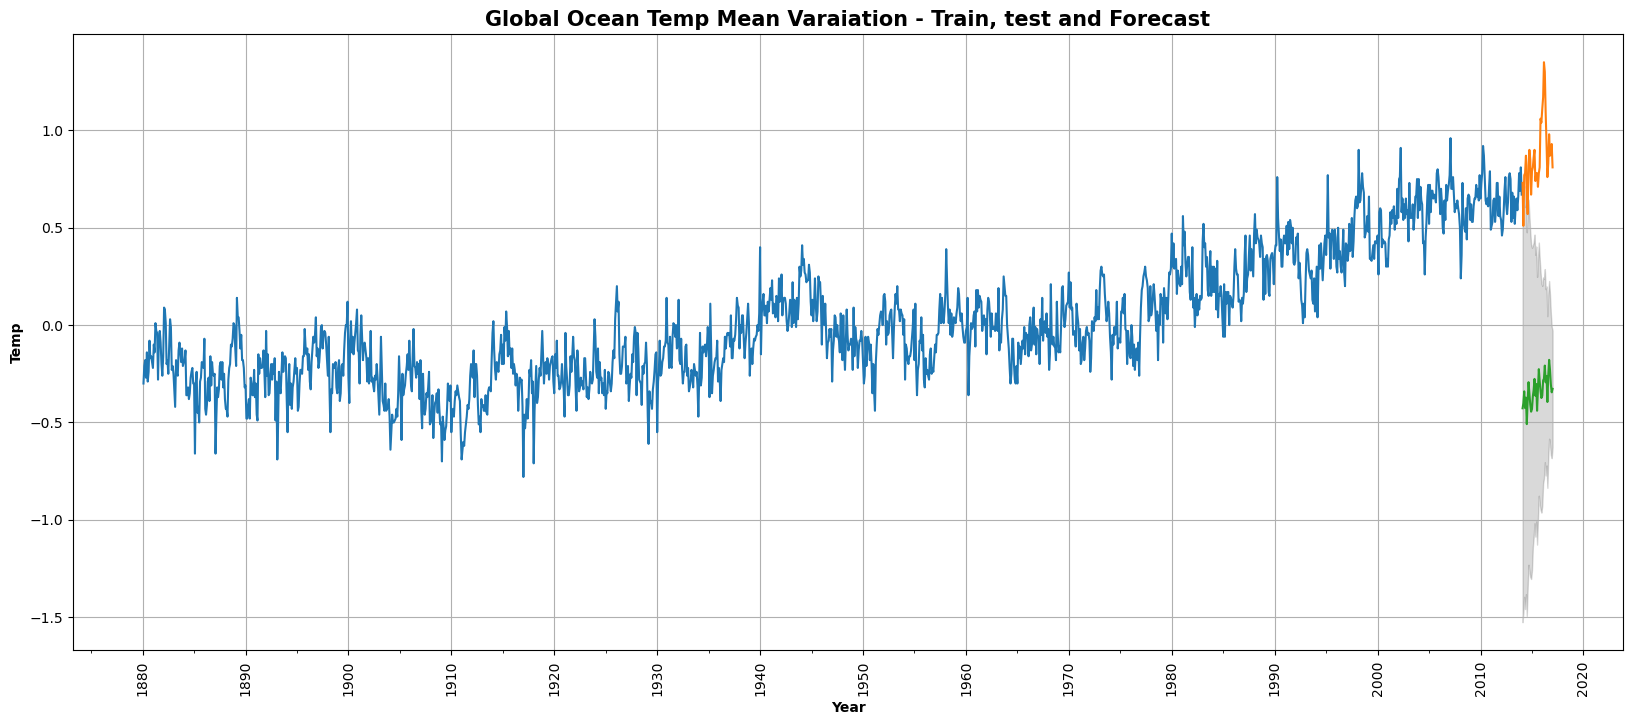

In [39]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(temp_index_train.index,temp_index_train['Mean'])
ax.plot(temp_index_test.index,temp_index_test['Mean'])
ax.plot(temp_index_predicted_forecast_date.index.values,temp_index_predicted_forecast_date['mean'])
ax.fill_between(temp_index_predicted_forecast_date.index.values,temp_index_predicted_forecast_date['mean_ci_lower'],temp_index_predicted_forecast_date['mean_ci_upper'],color='k', alpha=.15)

# Set title and labels for axes

plt.title("Global Ocean Temp Mean Varaiation - Train, test and Forecast",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(5))
plt.xticks(rotation = 90);

plt.show()

### <span style="font-size: 35px;">**Building a SARIMA Model - Latest Data**
<a id='SARIMA'></a>

### Stationarity

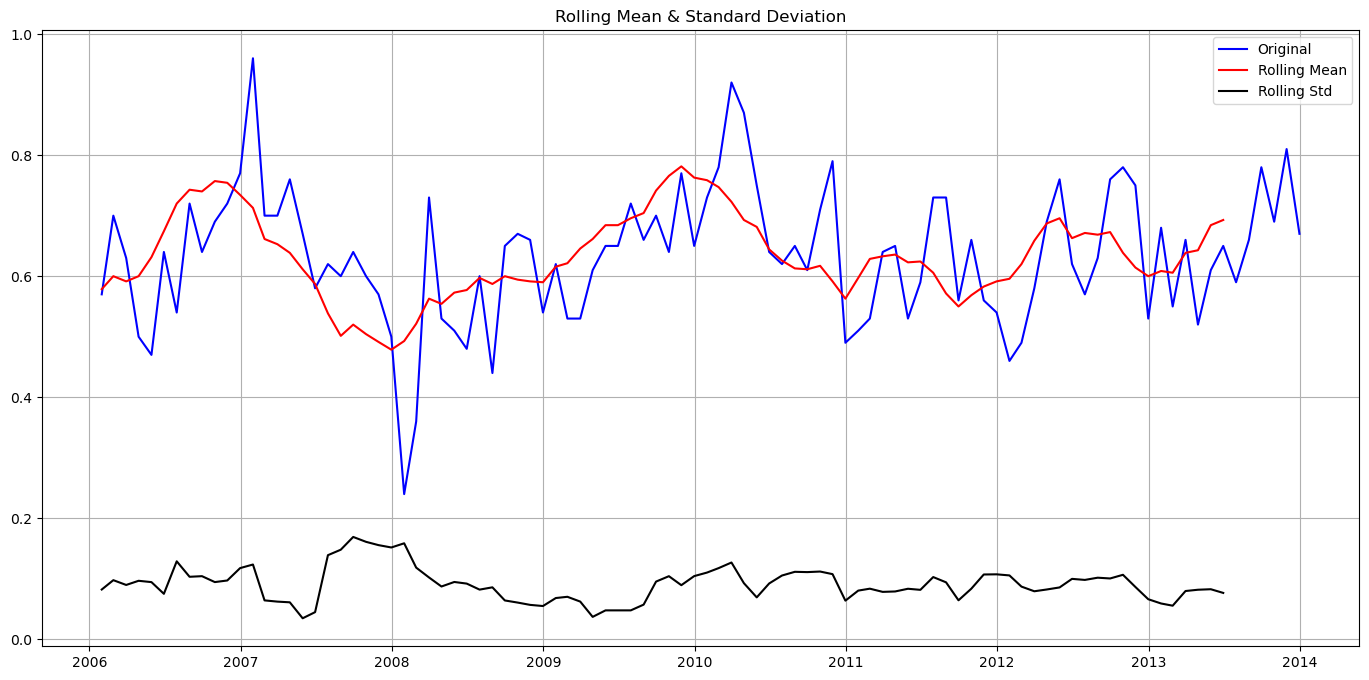


 Results of Dickey-Fuller Test:
	1%: -3.501
	5%: -2.892
	10%: -2.583


Test Statistic                -5.677412e+00
p-value                        8.640889e-07
#Lags Used                     0.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64 

Reject Ho - Time Series is Stationary


In [40]:
rcParams['figure.figsize'] = 17,8
test_stationarity(temp_index_latest_train['Mean'])

d = 0

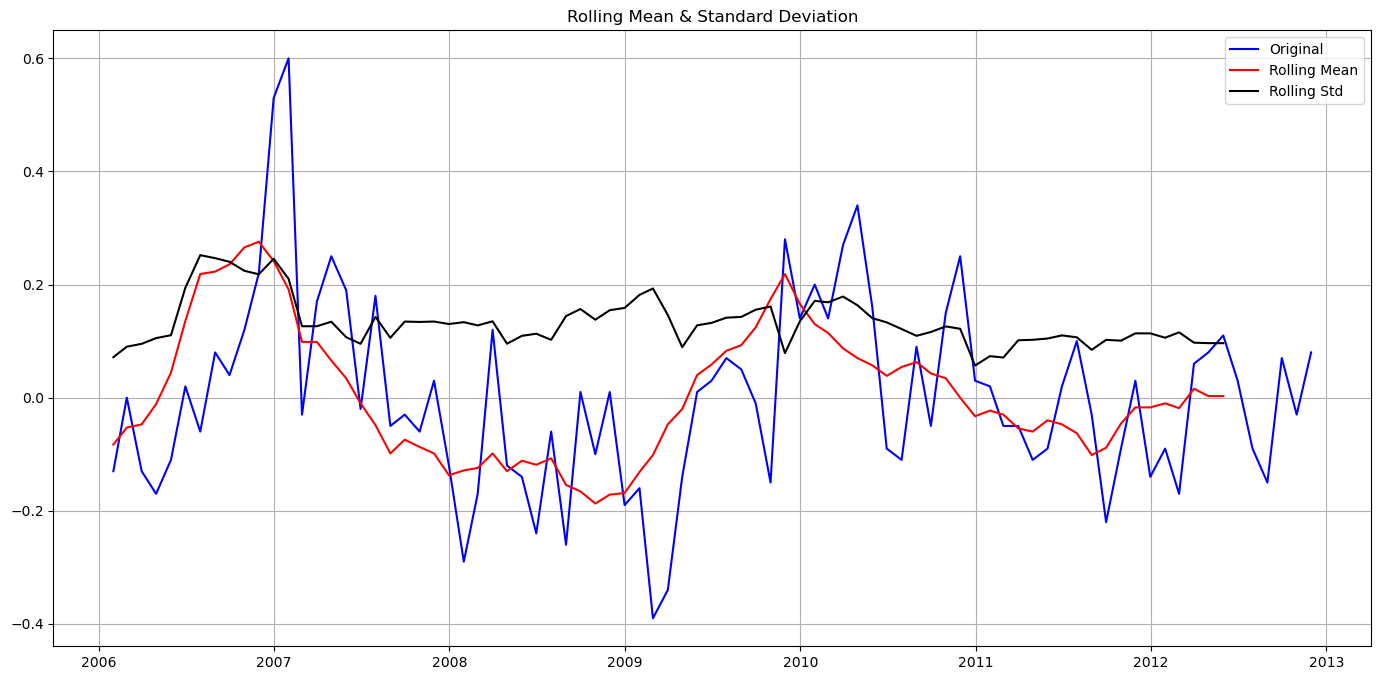


 Results of Dickey-Fuller Test:
	1%: -3.513
	5%: -2.897
	10%: -2.586


Test Statistic                 -4.849920
p-value                         0.000044
#Lags Used                      0.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64 

Reject Ho - Time Series is Stationary


In [41]:
test_stationarity(temp_index_latest_train['Mean'].diff(13).dropna())

D = 1

### SARIMA

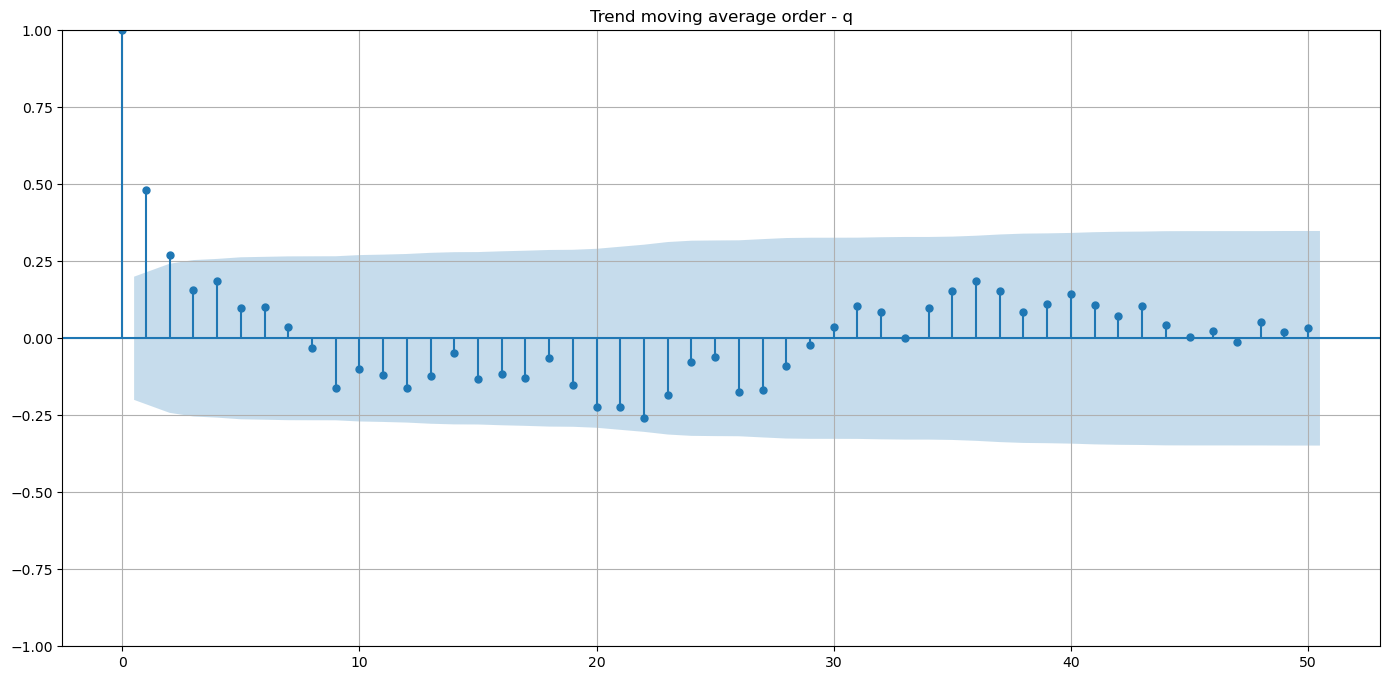

In [42]:
#To determine 'q'
plot_acf(temp_index_latest_train['Mean'],lags=50,title='Trend moving average order - q');
plt.grid()
plt.show();

q = 2

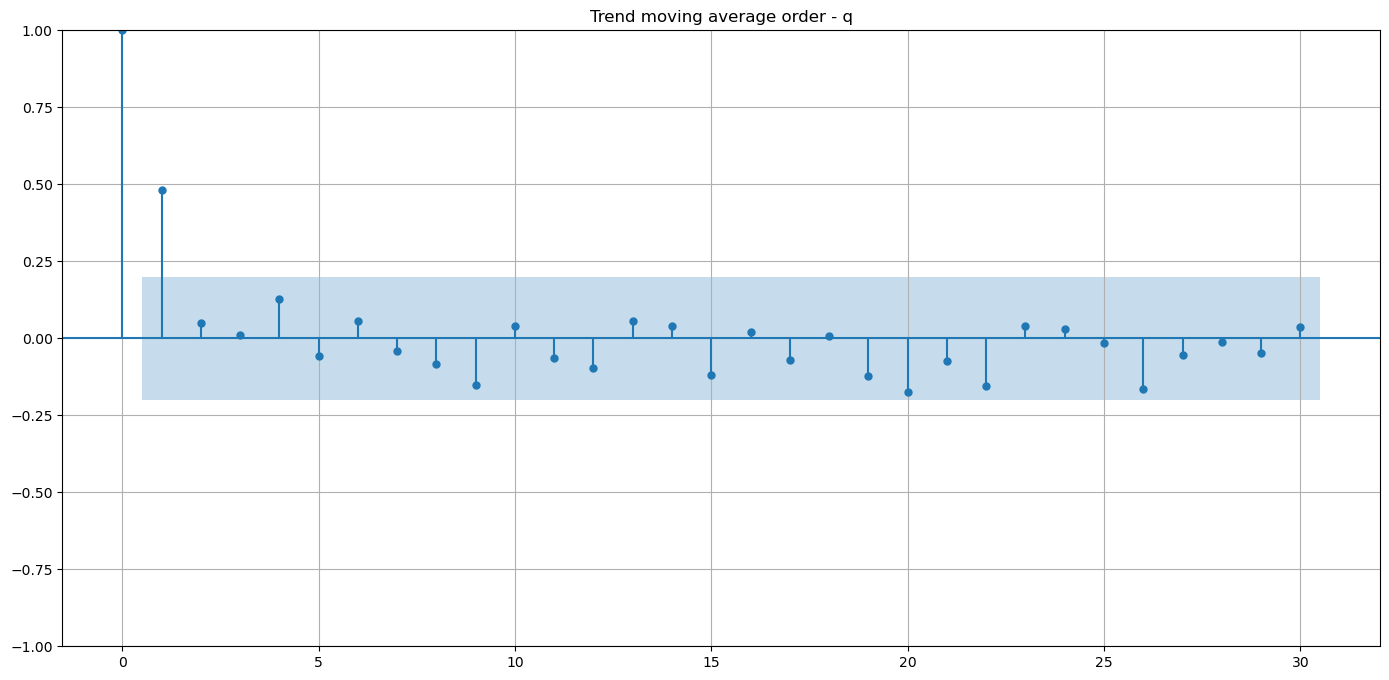

In [43]:
#To determine 'p'
plot_pacf(temp_index_latest_train['Mean'],lags=30,title='Trend moving average order - q');
plt.grid()
plt.show();

p = 1

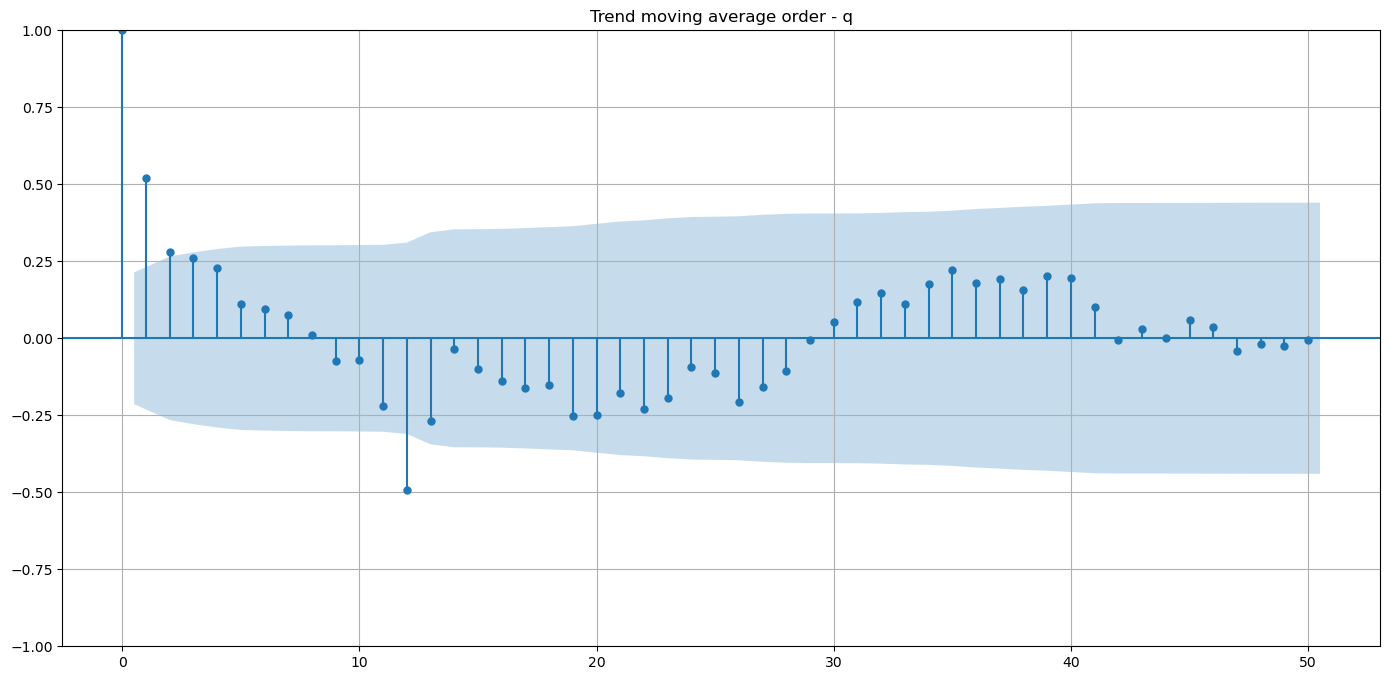

In [44]:
#To determine 'Q'
plot_acf(temp_index_latest_train['Mean'].diff(12).dropna(),lags=50,title='Trend moving average order - q');
plt.grid()
plt.show();

Q = 2

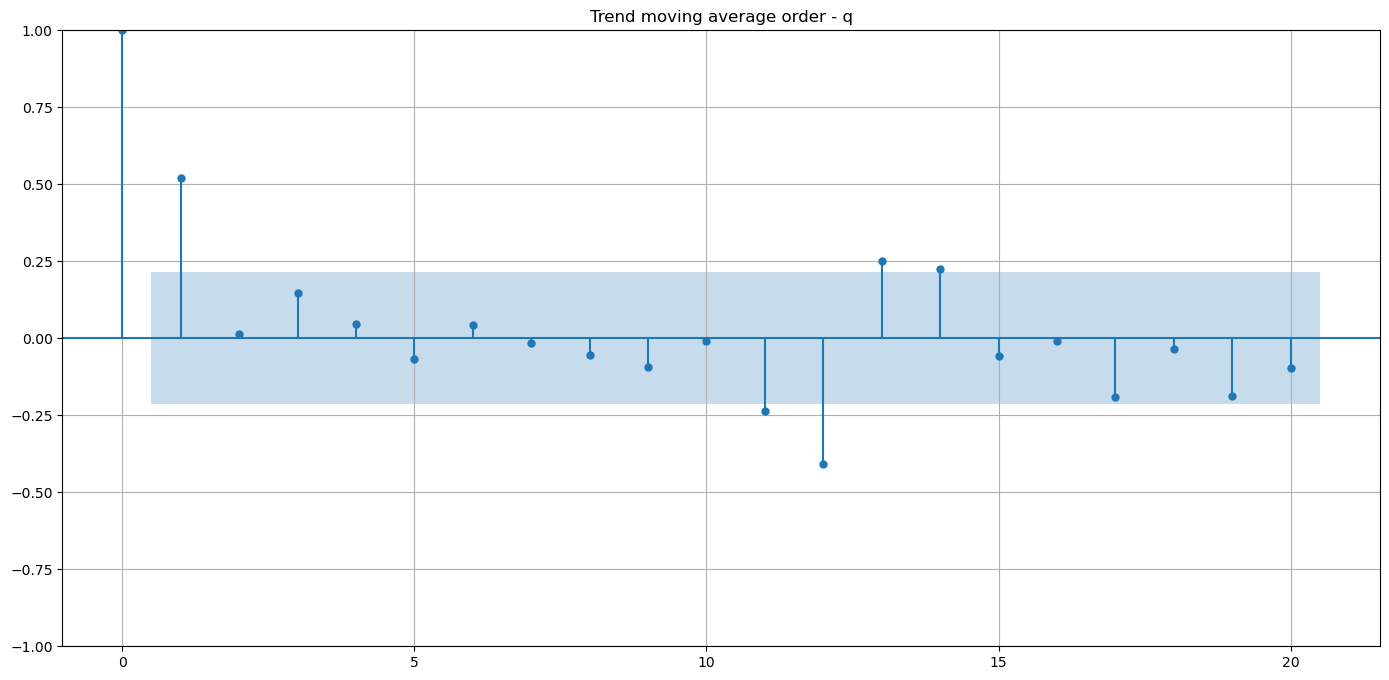

In [45]:
#To determine 'P'
plot_pacf(temp_index_latest_train['Mean'].diff(12).dropna(),lags=20,title='Trend moving average order - q');
plt.grid()
plt.show();

P = 1

In [46]:
p = 1
d = 0
q = 2
P = 1
D = 1
Q = 2

In [47]:
model = auto_arima(temp_index_latest_train['Mean'], start_p=0, start_q=0,
                      test='adf',
                      max_p=p+1, max_q=q+1,
                      m=12,
                      d=d,
                      seasonal=True,
                      start_P=0,max_P=P+1,
                      start_Q = 0, max_Q =Q+1,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-50.576, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-103.262, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-52.545, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-77.014, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-115.076, Time=0.49 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-99.449, Time=1.09 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-114.554, Time=2.35 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-114.989, Time=1.83 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-110.407, Time=0.59 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-112.995, Time=1.76 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=-116.946, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[12]             :

In [48]:
temp_index_latest_SARIMA = sm.tsa.statespace.SARIMAX(temp_index_latest_train['Mean'].values,
                                              order=(1, 1, 2),
                                              seasonal_order=(1, 2, 1, 12),
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)

temp_index_latest_results_SARIMA = temp_index_latest_SARIMA.fit(maxiter = 2000);
print(temp_index_latest_results_SARIMA.summary());

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 2, [1], 12)   Log Likelihood                  22.230
Date:                              Wed, 30 Aug 2023   AIC                            -32.460
Time:                                      13:13:35   BIC                            -20.308
Sample:                                           0   HQIC                           -27.749
                                               - 96                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0342      1.706     -0.020      0.984      -3.378       3.310
ma.L1         -0.40

In [49]:
temp_index_latest_predicted_forecast = temp_index_latest_results_SARIMA.get_forecast(steps=len(temp_index_test))
temp_index_latest_predicted_forecast_date = temp_index_latest_predicted_forecast.summary_frame(alpha=0.05).set_index(temp_index_test.index)
temp_index_latest_predicted_forecast.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.660992,0.149565,0.367851,0.954134
1,0.640976,0.170888,0.306041,0.975911
2,0.654125,0.184023,0.293447,1.014803
3,0.650426,0.196452,0.265386,1.035465
4,0.698431,0.208135,0.290493,1.106369


In [57]:
temp_index_latest_SARIMA_rmse = mean_squared_error(temp_index_latest_test['Mean'],temp_index_latest_predicted_forecast.predicted_mean,squared=False)
temp_index_latest_SARIMA_mape = np.mean(np.abs((temp_index_latest_test['Mean']-temp_index_latest_predicted_forecast.predicted_mean)/(temp_index_latest_test['Mean']))*100)
temp_index_latest_SARIMA_resultsDf2 = pd.DataFrame({'RMSE': [temp_index_latest_SARIMA_rmse], 'MAPE':[temp_index_latest_SARIMA_mape]},index=['temp_index_latest - SARIMA(1,1,2)(1,2,1,12)'])
temp_index_latest_SARIMA_resultsDf2.round(2)

,RMSE,MAPE
"temp_index_latest - SARIMA(1,1,2)(1,2,1,12)",0.24,22.0


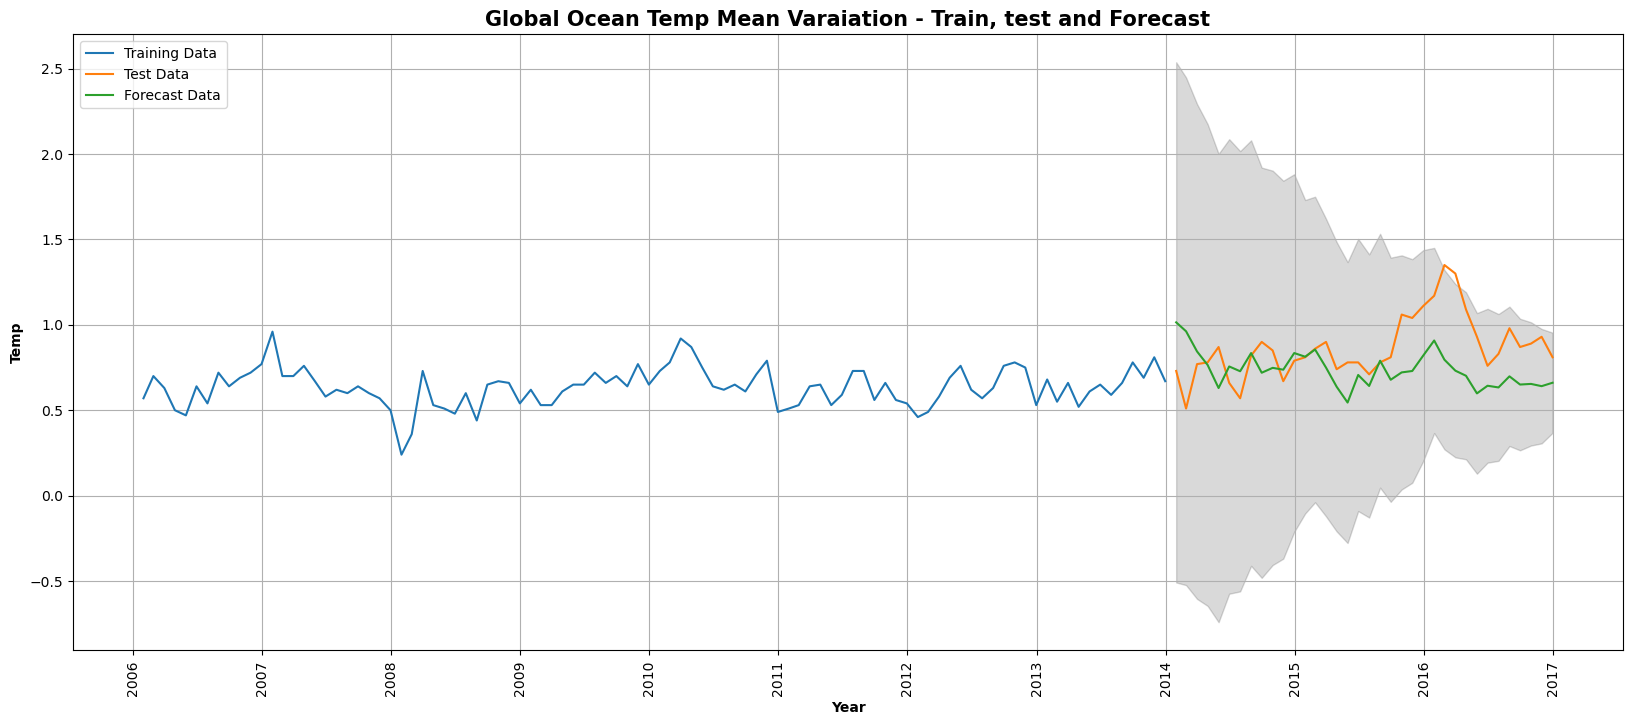

In [51]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(temp_index_latest_train.index,temp_index_latest_train['Mean'])
ax.plot(temp_index_latest_test.index,temp_index_latest_test['Mean'])
ax.plot(temp_index_latest_predicted_forecast_date.index.values,temp_index_latest_predicted_forecast_date['mean'])
ax.fill_between(temp_index_latest_predicted_forecast_date.index.values,temp_index_latest_predicted_forecast_date['mean_ci_lower'],temp_index_latest_predicted_forecast_date['mean_ci_upper'],color='k', alpha=.15)

# Set title and labels for axes
plt.legend(['Training Data','Test Data','Forecast Data'],loc="upper left")
plt.title("Global Ocean Temp Mean Varaiation - Train, test and Forecast",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Temp",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()

## Triple Exponential Smoothing

In [52]:
# temp_index_TES_train = temp_index_train[::-1].copy()
# temp_index_TES_test = temp_index_test[::-1].copy()

temp_index_TES_train = temp_index_latest_train[::-1].copy()
temp_index_TES_test = temp_index_latest_test[::-1].copy()

In [53]:
#Model Declaration and fit
temp_index_model_TES = ExponentialSmoothing(temp_index_TES_train['Mean'],trend='additive',seasonal='additive',freq='M')

temp_index_model_TES_autofit = temp_index_model_TES.fit()

In [54]:
#Parameters of Optimized Fit
temp_index_model_TES_autofit.params

{'smoothing_level': 0.4628720799024336,
 'smoothing_trend': 8.161625872374405e-17,
 'smoothing_seasonal': 5.0364427821631753e-17,
 'damping_trend': nan,
 'initial_level': 0.6273248975040189,
 'initial_trend': 0.0009121427394100575,
 'initial_seasons': array([-0.03545418, -0.05288986,  0.0401352 ,  0.00674888, -0.01675947,
        -0.03013618, -0.01367441, -0.0020326 ,  0.02836093,  0.03987173,
         0.06276218, -0.05586419]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
# Prediction on the test data
temp_index_TES_predicted_forecast = temp_index_model_TES_autofit.forecast(steps=len(temp_index_TES_test))

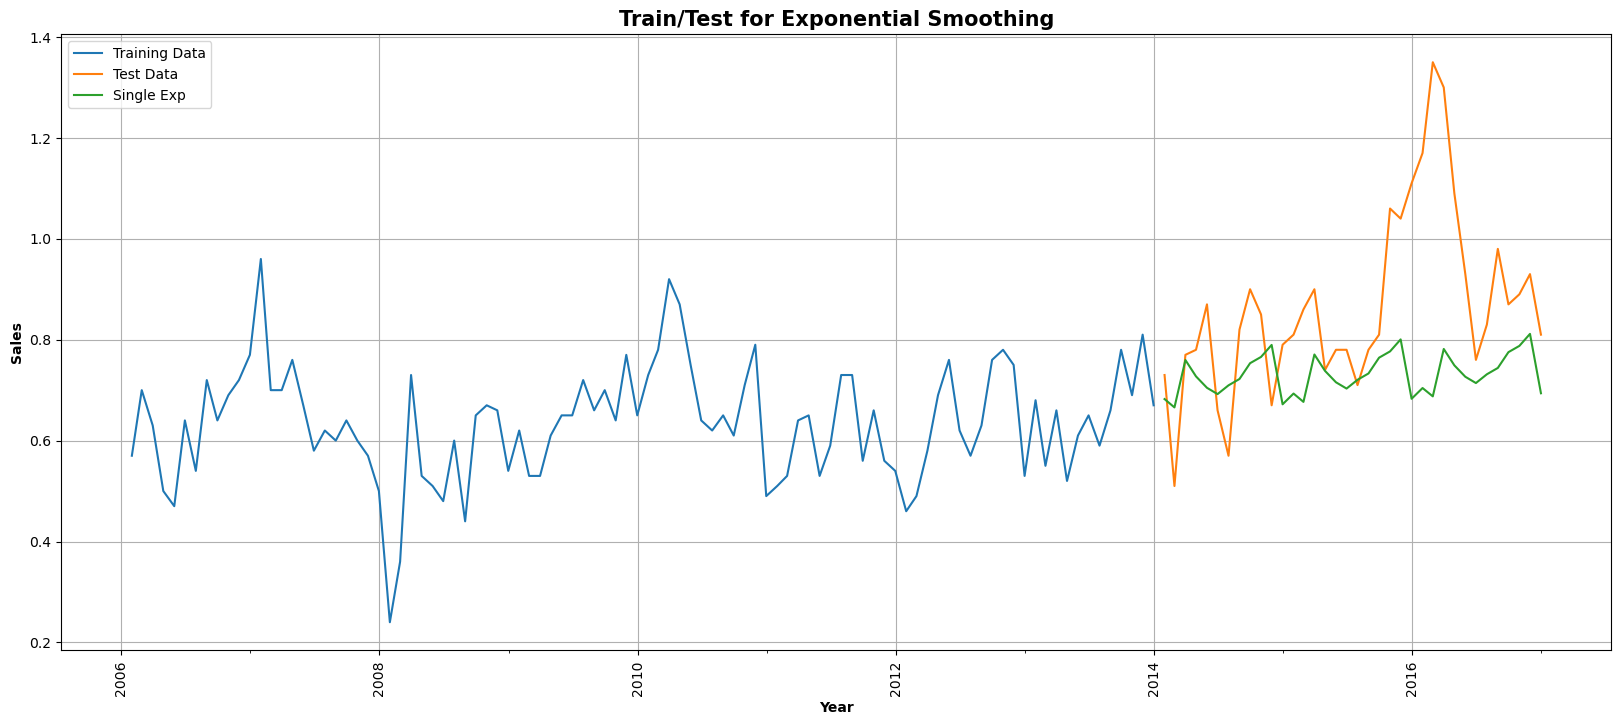

In [56]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))
plt.grid()

# Add x-axis and y-axis
ax.plot(temp_index_TES_train.index.values,temp_index_TES_train['Mean'])
ax.plot(temp_index_TES_test.index.values,temp_index_TES_test['Mean'])
ax.plot(temp_index_TES_test.index.values,temp_index_TES_predicted_forecast)


# Set title and labels for axes
plt.legend(['Training Data','Test Data','Single Exp','Double Exp','Triple Exp'],loc="upper left")
plt.title("Train/Test for Exponential Smoothing",fontsize=15, weight="bold")
plt.xlabel("Year",fontsize=10,weight="bold")
plt.ylabel("Sales",fontsize=10,weight="bold")

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
plt.xticks(rotation = 90);

plt.show()